
# Project: Investigate a Movie Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This investigation uses a large movie database to explore the idea that objective data points, such as Budget, Revenue, and Runtime have no discerable affect on the Popularity (a subjective score) of any particular movie.

### Dataset Description 

The dataset used in this project contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It covers films from 1960 through 2015. 



### Question for Analysis

1) Does budget, revenue, or runtime appear to affect popularity score?



In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Magic Word

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties
###### Load original data from csv, write a function to limit a repetitive task, and give the data an initial overview. 

In [2]:
# Load original csv and check it worked

df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
# Functions

def save_df():
    # Basic save/reload function to eliminate typing csv name each time it's needed. 
    # Usage: type 'save_df()' and run cell. There are no parameters. 
    # The function will display "Saved and reloaded!" when successful. 
    # This function saves to a newly created csv to preserve original data integrity.
    global df 
    df.to_csv('tmdb-movies_edited.csv')
    df = pd.read_csv('tmdb-movies_edited.csv', index_col=0)
    print("Saved and reloaded!") 


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

###### First, are there any duplicate movies?

In [5]:
len(df) - len(df.duplicated(['original_title']))

0

###### No duplicated movies, so data is good in this area.

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


###### The DB covers movies from 1960 through 2015. The difficulty in using such a broad collection is that several factors (such as going off the gold standard in 1971, loss of the value of the dollar, etc.) make a budget and revenue comparison between a 1960 movie and a 2015 movie very complex. Because the adjusted columns account for inflation in 2010 dollars, we will only be using the *_adj columns. 
###### Further, we will be removing movies from 1960 through 1999 before looking over multiple comparisons.

### Do some basic cleaning for readability

###### Clean all budget and revenue columns - make it show in millions for readablity. Save and check results.

In [7]:
df['budget'] = df['budget'].div(1000000)
df['revenue'] = df['revenue'].div(1000000)
df['budget_adj'] = df['budget_adj'].div(1000000)
df['revenue_adj'] = df['revenue_adj'].div(1000000)
save_df()
df.head()

Saved and reloaded!


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150.0,1513.528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893
1,76341,tt1392190,28.419936,150.0,378.436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137.999939,348.161292
2,262500,tt2908446,13.112507,110.0,295.238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101.199955,271.619025
3,140607,tt2488496,11.173104,200.0,2068.178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183.999919,1902.723130
4,168259,tt2820852,9.335014,190.0,1506.249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174.799923,1385.748801


###### Check top genres of original data by revenue_adj

In [8]:
df.groupby('genres')[['revenue_adj']].mean().sort_values(['revenue_adj'], ascending=False) 

,revenue_adj
genres,
Horror|Thriller|Adventure,1907.005842
Science Fiction|Adventure|Family|Fantasy,1791.694309
Crime|Drama|Mystery|Thriller|Action,1583.049536
Family|Animation|Drama,1159.591590
Family|Fantasy|Adventure,1025.467110
...,...
Adventure|Action|Comedy|Science Fiction,0.000000
Drama|Thriller|Horror|Mystery,0.000000
Drama|Thriller|Mystery|Foreign,0.000000


###### Crop dataset down to 2000-2015 then use Save function

In [9]:
df.drop(df.index[df['release_year'] <= 1999], inplace=True)
save_df()
df.info()

Saved and reloaded!
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7168 entries, 0 to 8887
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7168 non-null   int64  
 1   imdb_id               7158 non-null   object 
 2   popularity            7168 non-null   float64
 3   budget                7168 non-null   float64
 4   revenue               7168 non-null   float64
 5   original_title        7168 non-null   object 
 6   cast                  7105 non-null   object 
 7   homepage              2730 non-null   object 
 8   director              7129 non-null   object 
 9   tagline               4986 non-null   object 
 10  keywords              5904 non-null   object 
 11  overview              7164 non-null   object 
 12  runtime               7168 non-null   int64  
 13  genres                7150 non-null   object 
 14  production_companies  6319 non-null   object 
 15  r

### Individual visualizations of each data point to be explored.

###### Display Runtime of movies under 200 minutes

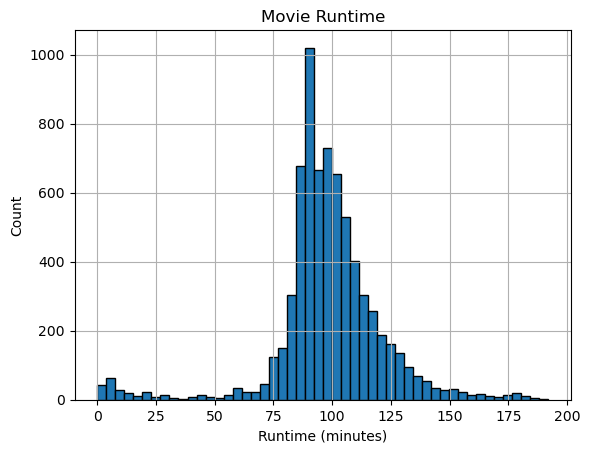

In [10]:
rt = df['runtime'].loc[lambda x: x<200].hist(edgecolor='black', bins=50)
rt.set_xlabel('Runtime (minutes)')
rt.set_ylabel('Count')
rt.set_title('Movie Runtime');

###### This graph shows that the bulk of movies fall into the 90 through 120 minute range. Limiting the range in collecting runtimes to those movies under 200 minutes gives a better understanding since very few movies have a runtime over 200 minutes.

###### Display Popularity of movies

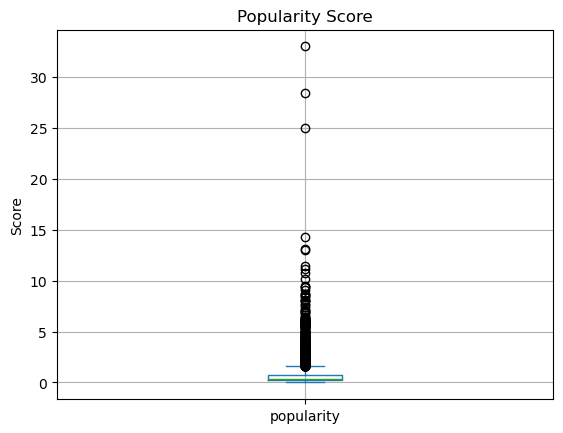

In [11]:
df.popularity.plot.box(grid=True, xlabel='Popularity', ylabel='Score', title='Popularity Score');

###### This box plot shows the range of popularity scores and where the bulk of scores lies. It does not provide much assistance in answering the question, but allows us to see that most moives have a low popularity score.

###### Display Revenue of movies

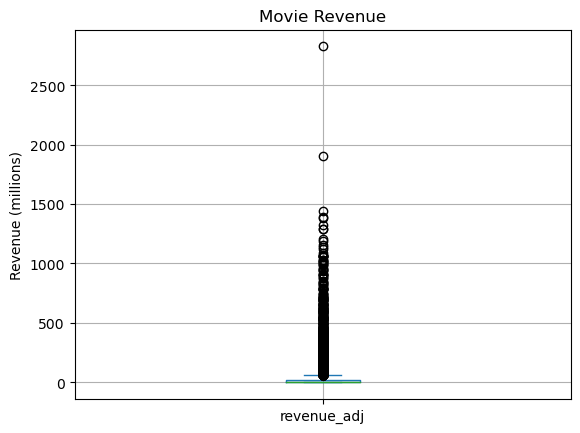

In [12]:
df.revenue_adj.plot.box(grid=True, ylabel='Revenue (millions)', title='Movie Revenue');

###### This box plot shows the range of revenue. While the majority made under 750 million, there were a several blockbusters making over 1 billion dollars in revenue. 

### Comparisons between various data point to look for patterns.

###### Find average popularity score for each director, high to low.

In [13]:
df.groupby('director')[['popularity']].mean().sort_values(['popularity'], ascending=False) 

,popularity
director,
Colin Trevorrow,16.696886
Joe Russo|Anthony Russo,12.971027
Chad Stahelski|David Leitch,11.422751
George Miller,10.254001
Don Hall|Chris Williams,8.691294
...,...
Jean-Xavier de Lestrade,0.001315
Zana Briski|Ross Kauffman,0.001117
Dibakar Banerjee,0.001115


###### Compare runtime to popularity

In [14]:
df.groupby('runtime')[['popularity']].mean().sort_values(['popularity'], ascending=False) 

,popularity
runtime,
169,8.557065
162,6.235416
156,4.605189
201,3.687482
151,3.512871
...,...
20,0.015310
900,0.006925
19,0.003731


###### Compare runtime to revenue_adj

In [15]:
df.groupby('runtime')[['revenue_adj']].mean().sort_values(['revenue_adj'], ascending=False) 

,revenue_adj
runtime,
162,1507.710531
151,733.105148
201,663.139005
169,637.309369
187,614.109809
...,...
44,0.000000
43,0.000000
41,0.000000


###### Compare director to revenue_adj

In [16]:
df.groupby('director')[['revenue_adj']].mean().sort_values(['revenue_adj'], ascending=False) 

,revenue_adj
director,
James Cameron,1423.661596
Kyle Balda|Pierre Coffin,1064.192017
Lee Unkrich,1063.171911
Andrew Adamson|Kelly Asbury|Conrad Vernon,1061.903623
Andrew Stanton|Lee Unkrich,1024.886690
...,...
LÃ©a Pool,0.000000
Doug Sweetland,0.000000
Doug Pray,0.000000


###### Compare genres to revenue_adj

In [17]:
df.groupby('genres')[['revenue_adj']].mean().sort_values(['revenue_adj'], ascending=False) 

,revenue_adj
genres,
Family|Fantasy|Adventure,1025.467110
Adventure|Action|Fantasy,990.417500
Adventure|Fantasy|Family|Mystery,986.688860
Action|Adventure|Science Fiction|Fantasy,951.361565
Action|Thriller|Science Fiction|Mystery|Adventure,825.500000
...,...
Fantasy|Horror,0.000000
Action|Science Fiction|Thriller|War,0.000000
Fantasy|Horror|Action|Science Fiction,0.000000


###### Compare budget_adj to revenue_adj

In [18]:
df.groupby('budget_adj')[['revenue_adj']].mean().sort_values(['revenue_adj'], ascending=False) 

,revenue_adj
budget_adj,
240.886903,2827.123750
183.999919,1902.723130
208.943742,1443.191435
257.599887,1292.632337
153.936015,1202.518036
...,...
4.040559,0.000000
88.426838,0.000000
4.047998,0.000000


###### Compare budget to popularity

In [19]:
df.groupby('budget_adj')[['popularity']].mean().sort_values(['popularity'], ascending=False) 

,popularity
budget_adj,
137.999939,17.051746
151.980023,16.820214
183.999919,11.173104
156.585479,10.578246
240.886903,9.432768
...,...
0.026292,0.004196
0.325893,0.003611
0.000005,0.002922


###### Compare revenue to popularity

In [20]:
df.groupby('revenue_adj')[['popularity']].mean().sort_values(['popularity'], ascending=False) 

,popularity
revenue_adj,
1392.445893,32.985763
348.161292,28.419936
572.690645,24.949134
712.291130,14.311205
271.619025,13.112507
...,...
0.146692,0.006346
0.128667,0.006115
0.898371,0.005391


###### Visualization of Budget and Revenue

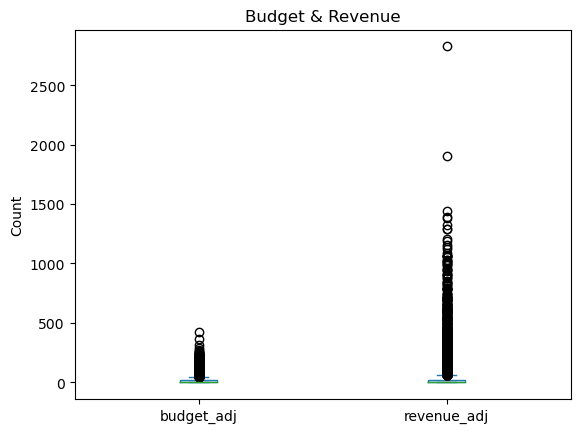

In [21]:
df.plot.box(column=['budget_adj', 'revenue_adj'], title='Budget & Revenue', ylabel='Count');

###### This plot of Budget and Revenue shows that making movies is a very profitable venture. While the highest budget was  roughly 500 million, revenue topped 2.5 billion. It does not show if a specific movie is more profitable based on it's budget. This is just an aggregation of the data as a whole.


### Data Cleaning


##### The TMDB is a very large collection of movie information. It spans the years from 1960 to 2015. For reasons discussed above, we will only be using the budget_adj and revenue_adj columns for comparison in our investigation. Other columns - id, imdb_id, tagline, etc. - are unneeded in our investigation and will also be removed to speed up processing time. Finally, the span of records have been cut down. Movies from 1960 to the end of 1999 have been removed. Given the values of budget and revenue were adjusted to 2010 dollars, the collection from 2000 to 2015 will give a good representation and allow us to answer our questions about the data.  

###### Remove budget, revenue and other unneeded columns then save and reload

In [22]:
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'tagline', 'overview', 'homepage', 'keywords', 'production_companies'], axis=1, inplace=True)
save_df()

Saved and reloaded!


###### Show that the column drop worked

In [23]:
df.head() 

,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137.999939,1392.445893
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137.999939,348.161292
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101.199955,271.619025
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183.999919,1902.723130
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,174.799923,1385.748801


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7168 entries, 0 to 8887
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      7168 non-null   float64
 1   original_title  7168 non-null   object 
 2   cast            7105 non-null   object 
 3   director        7129 non-null   object 
 4   runtime         7168 non-null   int64  
 5   genres          7150 non-null   object 
 6   release_date    7168 non-null   object 
 7   vote_count      7168 non-null   int64  
 8   vote_average    7168 non-null   float64
 9   release_year    7168 non-null   int64  
 10  budget_adj      7168 non-null   float64
 11  revenue_adj     7168 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 728.0+ KB


###### While the above .info() call shows we have missing values in columns cast, director, and genres, these are irrelevant to the current exploration. The time (and processing time) to remove the few values is unnecessary.

<a id='eda'></a>
## Exploratory Data Analysis


### 1) Does budget, revenue, or runtime appear to affect popularity score?

###### Using popularity as our Dependent variable, this exploration will examine budget, revenue, and runtime to determine which, if any, of these Independent variables appears to have an impact on a film's popularity score. 

###### Also backcheck through XY swap if revenue and popularity appear to have a connection.

E:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


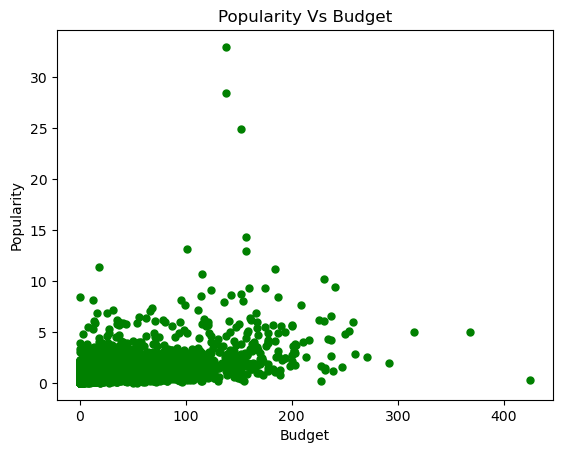

In [25]:
df.plot.scatter(x=['budget_adj'], y=['popularity'], s=25, color='green', 
                xlabel='Budget', ylabel='Popularity', title='Popularity Vs Budget');

###### The budget for a film does not appear to have any correlation to popularity. There are a few outliers in the data in both popularity and budget. These can be disregarded. The bulk of films had a budget under 200 million. At the same time, those films received a popluarity score under 10, with the bulk under 5. 
###### There is a slight uptick in popularity scores starting with a budget between 100 million and 200 million, but it is approximately the difference between 0 and 1 in the popularity score. 

E:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


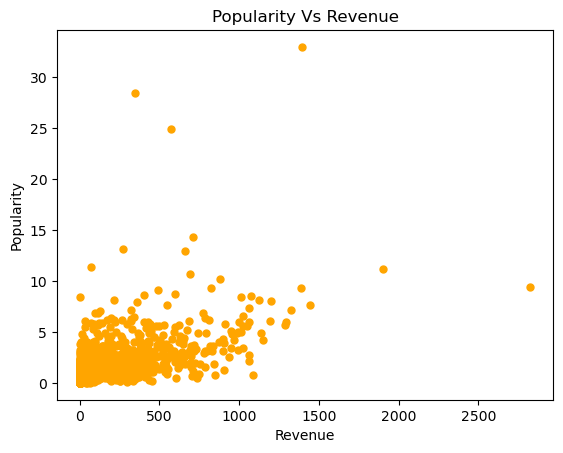

In [26]:
df.plot.scatter(x=['revenue_adj'], y=['popularity'], s=25, color='orange', 
                xlabel='Revenue', ylabel='Popularity', title='Popularity Vs Revenue');

###### This scatter plot gives us a film's popularity versus the revenue it generated. There seems to be no real correlation between revenue from a film versus it's popularity. 

###### Backtesting revenue versus popularity by reversing dependent and independent variables.

E:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


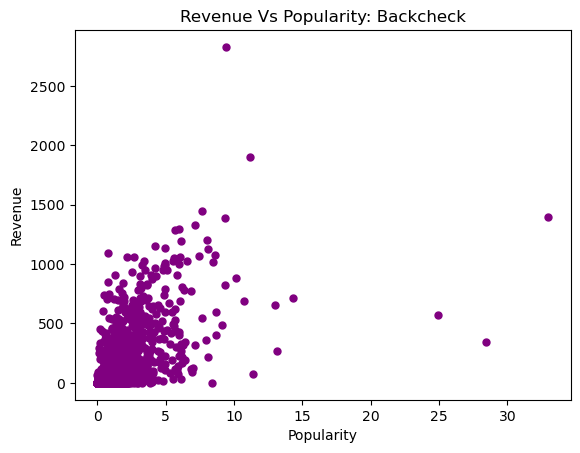

In [27]:
df.plot.scatter(x=['popularity'], y=['revenue_adj'], s=25, color='purple', 
                xlabel='Popularity', ylabel='Revenue', title='Revenue Vs Popularity: Backcheck');

###### The backtest performed as expected; the same graph appears except flipped on the Y axis. This means we show no real correlation between revenue and popularity. It just means the marketing for the film was really good for those films with a higher revenue.

###### The two plots below represent popularity scores compared to film runtime. 

E:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


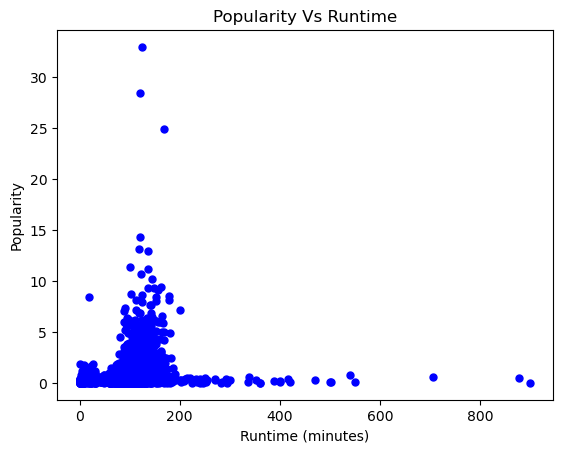

In [28]:
df.plot.scatter(x=['runtime'], y=['popularity'], s=25, color='blue', 
                xlabel='Runtime (minutes)', ylabel='Popularity', title='Popularity Vs Runtime');

###### This scatter plot shows the majority of high popularity scores are given to movies in the 75 through 200 minute runtime range. 

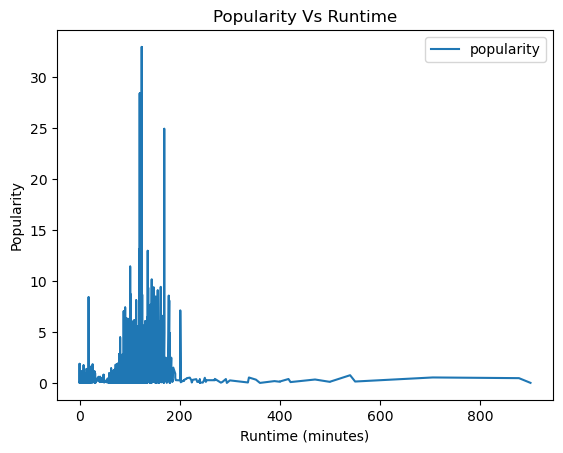

In [29]:
df.sort_values(by=['runtime']).plot.line(x='runtime', y='popularity', 
                                         xlabel='Runtime (minutes)', ylabel='Popularity', title='Popularity Vs Runtime');

###### This plot (same as above, in a line format instead of scatter) appears to show a correlation between the runtime of a film and it's popularity. Movies with a runtime between roughly 75 and 200 minutes have the highest scores, with the bulk at the 120 minute area. Given that we have already seen that most movies fall in this same range, no correlation can be found. 

#### As a curiosity, the two charts below will explore the popularity and revenue of the genres.

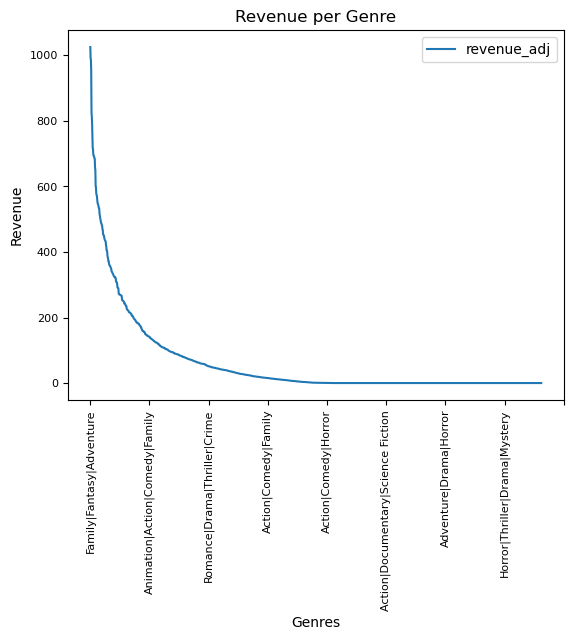

In [30]:
df.groupby('genres')[['revenue_adj']].mean().sort_values(['revenue_adj'], 
    ascending=False).plot(xlabel='Genres', ylabel='Revenue', rot=90, fontsize=8, title='Revenue per Genre');

##### The genre 'Family|Fantasy|Adventure' produced the highest revenue.

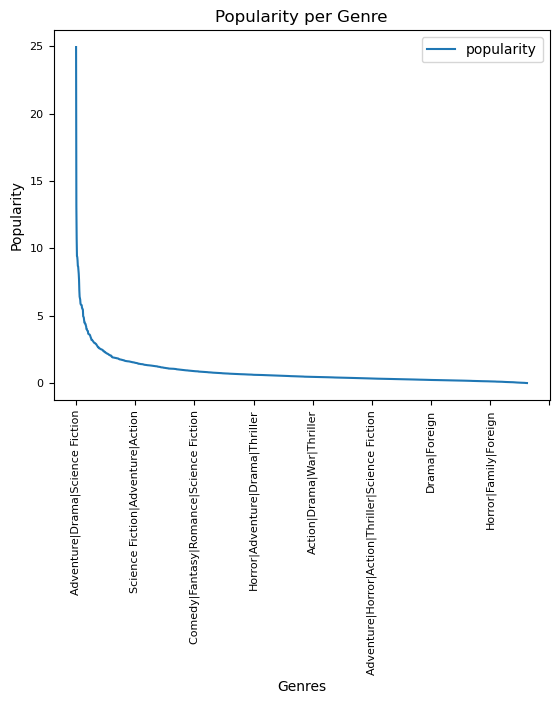

In [31]:
df.groupby('genres')[['popularity']].mean().sort_values(['popularity'], 
    ascending=False).plot(xlabel='Genres', ylabel='Popularity', rot=90, fontsize=8, title='Popularity per Genre');

##### The genre 'Adventure|Drama|Science Fiction' has the highest popularity.

###### This is interesting as it could be assumed that the most popular genre would also have the highest revenue. There are other factors at play here which are not reflected in the data available.

<a id='conclusions'></a>
## Conclusions

This investigation found that neither Budget, Director or Revenue had any impact on Popularity. Runtime had the most signifigant correlation to Popularity, however, it is more likely that the majority of movies fall into the 90 to 180 minute runtime category. There was no specific director that seemed to add to the Popularity score either. All in all, my conclusion is that people voted for what they liked and no single factor influenced that decision. Finding a correlation between hard data and subjective opinions is not an easy matter. 

### Limitation

The limitation of this investigation is mainly found in trying to find a correlation between objective data and customer sentiment. 

While it is possible to determine a genre which is popular, this will change over time. In some explorations of the data prior to limiting the timeframe, it was discovered that the Horror genre produced the most revenue. Once the data was cropped to 2000 through 2015, this changed to Family|Fantasy|Adventure. Tastes change over time, either in what type of movies are produced or in public sentiment. 

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [32]:
#Commented out this cell as my Anaconda installation (on Windows) does not have a 
#version of Tex available. I cannot export to PDF. 
# PS: Multiline comments show unwanted output when running this cell.

#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])